### Importing various libraries and dataset

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("train.csv")
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [133]:
print(df.shape)
(df.columns)

(891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Tracking of null values in the dataset

In [134]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

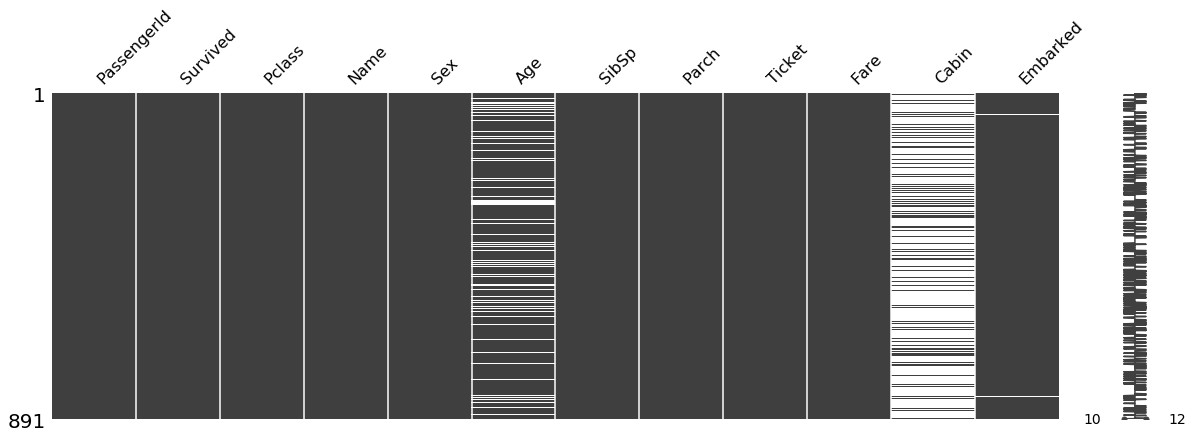

In [135]:
import missingno as mno
mno.matrix(df, figsize=(20,6))

###### OBSERVATIONS FOR NAN VALUES
1.Age, Cabin, Embarked columns have null values

2.Cabin has large number of null values thus Cabin may serve as the least significant feature

#### CHECKING FOR THE TYPE OF DATA PRESENT IN THE COLUMNS

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### ANALYSIS OF VARIOUS COLUMNS

In [137]:
## 0: non surviving
## 1: surviving
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [138]:
percent_surviving= 342/891*100
print(percent_surviving)

38.38383838383838


In [139]:
### persons having parents or children
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [140]:
## passengers travelling without parents or children.
travelling_single=678/891
print(travelling_single)

0.7609427609427609


In [141]:
### passengers with siblings or spouse
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [142]:
### Fare analysis
df.Fare.agg(['min','max','mean','median'])

min         0.000000
max       512.329200
mean       32.204208
median     14.454200
Name: Fare, dtype: float64

In [143]:
### persons of each sex
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [144]:
percent_male=577/891*100
print(percent_male)

64.75869809203144


In [145]:
### Describing the dataset
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [146]:
df.describe(include=['O'])

Name   Sex Ticket        Cabin Embarked
count                                891   891    891          204      889
unique                               891     2    681          147        3
top     Olsson, Mr. Nils Johan Goransson  male   1601  C23 C25 C27        S
freq                                   1   577      7            4      644

In [147]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [148]:
### dividing age into various categories
df['AgeBand']= pd.cut(df.Age,5)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked           AgeBand  
0      0         A/5 21171   7.2500   NaN        S  (16.336, 32.252]  
1      0          PC 17599  71.2833   C85        C  (32.252, 48.168]  
2      0  STON/O2. 3101282   7.9250   NaN        S  (16.336, 32.252]  
3      0            113803  53.1000  C123        S  (32.252, 48.168]  
4      0            373450   8.0500   NaN        S  (32.252, 48.168]

In [149]:
df.AgeBand.value_counts()

(16.336, 32.252]    346
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeBand, dtype: int64

### Finding correlation between survived and other features

In [150]:
### correlation between Pclass and Survived
df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Passengers travelling in Pclass 1 have highest survival

In [151]:
### correlation between Sex and Survived
df[['Sex','Survived']].groupby('Sex').mean().sort_values('Survived',ascending= False)

Survived
Sex             
female  0.742038
male    0.188908

Female passengers have high survival rate

In [152]:
### correlation between Embarked and Survived
df[['Embarked','Survived']].groupby('Embarked').mean().sort_values('Survived',ascending = False)

Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957

Passengers having Embarkment C have highest possibility of surviving

In [153]:
### correlation between SibSp and Survived
df[['Survived','SibSp']].groupby('SibSp').mean().sort_values("Survived", ascending= False)

Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000

Passengers with 1 spouse or sibling have highest possibility of surviving

In [154]:
### correlation between Parch and Survived
df[['Parch','Survived']].groupby('Parch').mean().sort_values("Survived",ascending= False)

Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000

Passengers with 3 as parents or children were most survived

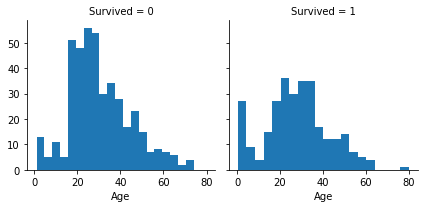

In [155]:
### relation between Age and Survived
g= sns.FacetGrid(df, col='Survived')
g.map(plt.hist,'Age', bins=20)

1. Most of the passengers belong to 15-30 yrs of age
2. Passengers with age around 80yrs were all survived.
3. Also passengers with very less age were having high survival.
4. Passengers in age group 15- 35yrs were having least survival rate.

C:\Users\Pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


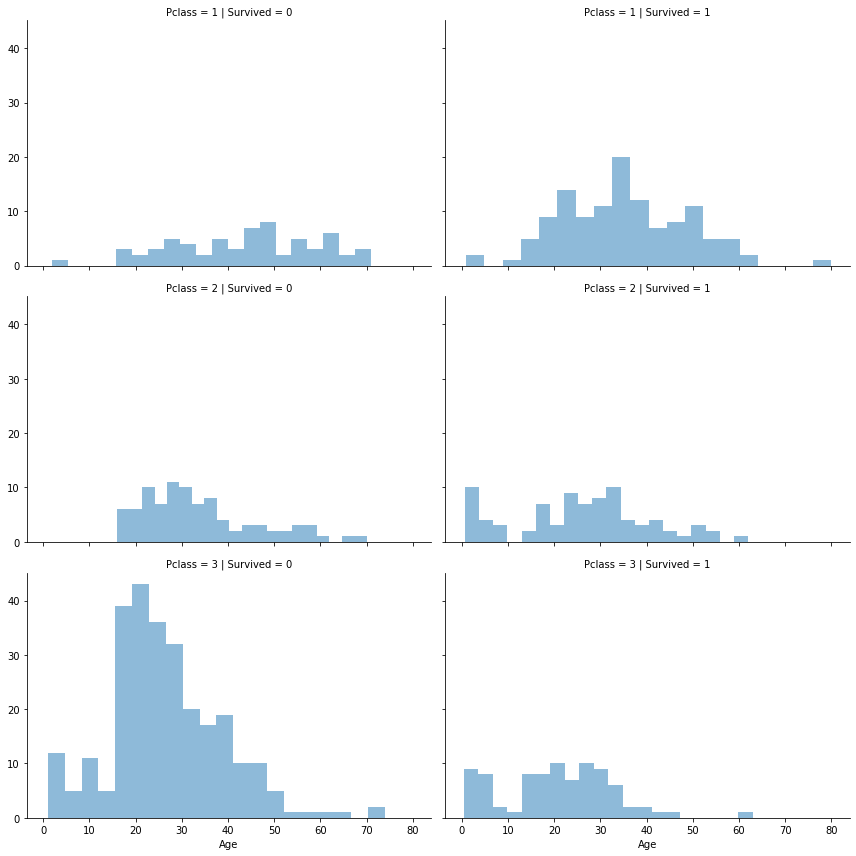

In [156]:
### relation between Age and Survived and Pclass
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=4, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

1. Most of the passengers belong to Pclass 3.
2. Pclass 3 passengers were having least survival rate.

C:\Users\Pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


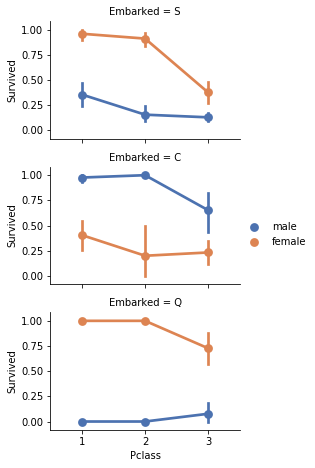

In [157]:
### relation between Sex and Survived and Embarked
grid = sns.FacetGrid(df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

1. Males with Embarkment C have higher survival rate than females.
2. Survival rates varies as Pclass3<Pclass2<Pclass1 for both males and females

C:\Users\Pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Pc\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


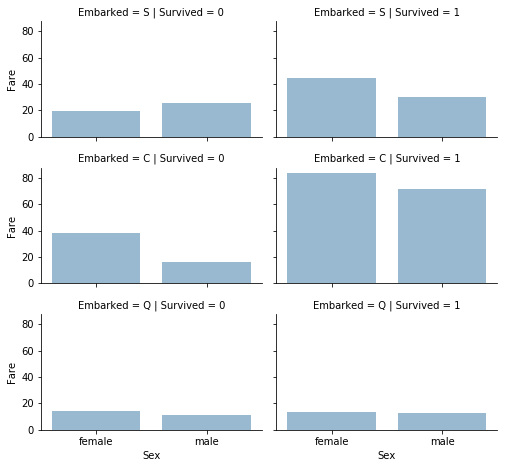

In [158]:
### relation between Fare and Survived and Embarked
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

1. Higher fare paying passengers had better survival.

#### PREPARING THE DATASET

1. Dropping Ticket column as it seems to be unique for all individuals
2. Dropping Cabin as it has very large no of NAN values
3. Dropping the PassengerId column as it is just a serial number count in the dataset.

In [159]:
df= df.drop(['Ticket','Cabin','PassengerId'], axis=1)

In [160]:
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked           AgeBand  
0    male  22.0      1      0   7.2500        S  (16.336, 32.252]  
1  female  38.0      1      0  71.2833        C  (32.252, 48.168]  
2  female  26.0      0      0   7.9250        S  (16.336, 32.252]  
3  female  35.0      1      0  53.1000        S  (32.252, 48.168]  
4    male  35.0      0      0   8.0500        S  (32.252, 48.168]

##### EXTRACTION OF ESSSENTIAL INFORMATION FROM Name:

In [161]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

There are some least occuring Title as we can replace them in some way.

In [162]:
df.Title = df.Title.replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df.head(5)
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df.Title.nunique()

5

In [163]:
### correlation between Title and Survived
df[['Title','Survived']].groupby(['Title']).mean().sort_values('Survived',ascending=False)

Survived
Title           
Mrs     0.793651
Miss    0.702703
Master  0.575000
Rare    0.347826
Mr      0.156673

1. Females with Title as Mrs and Miss have very high survival rates.

#### NOW Name can be dropped

In [164]:
df= df.drop('Name', axis=1)
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

            AgeBand Title  
0  (16.336, 32.252]    Mr  
1  (32.252, 48.168]   Mrs  
2  (16.336, 32.252]  Miss  
3  (32.252, 48.168]   Mrs  
4  (32.252, 48.168]    Mr

#### Filling up of the NAN values

1. Using SimpleImputer to impute most frequent value in Embarked column

In [165]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df['Embarked']=si.fit_transform(df['Embarked'].values.reshape(-1,1))

In [166]:
df.Embarked.isnull().sum()

0

In [167]:
df[['Embarked','Survived']].groupby("Embarked").mean()

Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009

In [168]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0         0       3    male  22.0      1      0   7.2500        S   
1         1       1  female  38.0      1      0  71.2833        C   
2         1       3  female  26.0      0      0   7.9250        S   
3         1       1  female  35.0      1      0  53.1000        S   
4         0       3    male  35.0      0      0   8.0500        S   

            AgeBand Title  
0  (16.336, 32.252]    Mr  
1  (32.252, 48.168]   Mrs  
2  (16.336, 32.252]  Miss  
3  (32.252, 48.168]   Mrs  
4  (32.252, 48.168]    Mr

In [169]:
### categorizing Age according to AgeBand
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age']=4

In [170]:
### now Dropping the AgeBand column
df=df.drop(['AgeBand'],axis=1)
df.head()

Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked Title
0         0       3    male  1.0      1      0   7.2500        S    Mr
1         1       1  female  2.0      1      0  71.2833        C   Mrs
2         1       3  female  1.0      0      0   7.9250        S  Miss
3         1       1  female  2.0      1      0  53.1000        S   Mrs
4         0       3    male  2.0      0      0   8.0500        S    Mr

### OneHotEncoding the Sex, Embarked and Title columns

In [171]:
col_en=df[['Sex','Title','Embarked']]

In [172]:
col_en= pd.get_dummies(col_en)
col_en

Sex_female  Sex_male  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0             0         1             0           0         1          0   
1             1         0             0           0         0          1   
2             1         0             0           1         0          0   
3             1         0             0           0         0          1   
4             0         1             0           0         1          0   
..          ...       ...           ...         ...       ...        ...   
886           0         1             0           0         0          0   
887           1         0             0           1         0          0   
888           1         0             0           1         0          0   
889           0         1             0           0         1          0   
890           0         1             0           0         1          0   

     Title_Rare  Embarked_C  Embarked_Q  Embarked_S  
0             0           0           0           1  
1             0           1           0           0  
2             0           0           0           1  
3             0           0           0           1  
4             0           0           0           1  
..          ...         ...         ...         ...  
886           1           0           0           1  
887           0           0           0           1  
888           0           0           0           1  
889           0           1           0           0  
890           0           0           1           0  

[891 rows x 10 columns]

In [173]:
### concatenating df and col_en
df= df= pd.concat((df,col_en), axis=1)
df

Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked Title  \
0           0       3    male  1.0      1      0   7.2500        S    Mr   
1           1       1  female  2.0      1      0  71.2833        C   Mrs   
2           1       3  female  1.0      0      0   7.9250        S  Miss   
3           1       1  female  2.0      1      0  53.1000        S   Mrs   
4           0       3    male  2.0      0      0   8.0500        S    Mr   
..        ...     ...     ...  ...    ...    ...      ...      ...   ...   
886         0       2    male  1.0      0      0  13.0000        S  Rare   
887         1       1  female  1.0      0      0  30.0000        S  Miss   
888         0       3  female  NaN      1      2  23.4500        S  Miss   
889         1       1    male  1.0      0      0  30.0000        C    Mr   
890         0       3    male  1.0      0      0   7.7500        Q    Mr   

     Sex_female  Sex_male  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
0             0         1             0           0         1          0   
1             1         0             0           0         0          1   
2             1         0             0           1         0          0   
3             1         0             0           0         0          1   
4             0         1             0           0         1          0   
..          ...       ...           ...         ...       ...        ...   
886           0         1             0           0         0          0   
887           1         0             0           1         0          0   
888           1         0             0           1         0          0   
889           0         1             0           0         1          0   
890           0         1             0           0         1          0   

     Title_Rare  Embarked_C  Embarked_Q  Embarked_S  
0             0           0           0           1  
1             0           1           0           0  
2             0           0           0           1  
3             0           0           0           1  
4             0           0           0           1  
..          ...         ...         ...         ...  
886           1           0           0           1  
887           0           0           0           1  
888           0           0           0           1  
889           0           1           0           0  
890           0           0           1           0  

[891 rows x 19 columns]

In [174]:
### now drop the original Sex, Embarked and Title columns
df= df.drop(['Sex','Title','Embarked'],axis=1)
df

Survived  Pclass  Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  1.0      1      0   7.2500           0         1   
1           1       1  2.0      1      0  71.2833           1         0   
2           1       3  1.0      0      0   7.9250           1         0   
3           1       1  2.0      1      0  53.1000           1         0   
4           0       3  2.0      0      0   8.0500           0         1   
..        ...     ...  ...    ...    ...      ...         ...       ...   
886         0       2  1.0      0      0  13.0000           0         1   
887         1       1  1.0      0      0  30.0000           1         0   
888         0       3  NaN      1      2  23.4500           1         0   
889         1       1  1.0      0      0  30.0000           0         1   
890         0       3  1.0      0      0   7.7500           0         1   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Embarked_C  \
0               0           0         1          0           0           0   
1               0           0         0          1           0           1   
2               0           1         0          0           0           0   
3               0           0         0          1           0           0   
4               0           0         1          0           0           0   
..            ...         ...       ...        ...         ...         ...   
886             0           0         0          0           1           0   
887             0           1         0          0           0           0   
888             0           1         0          0           0           0   
889             0           0         1          0           0           1   
890             0           0         1          0           0           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 16 columns]

In [175]:
df.Age.isnull().sum()

177

#### Imputing Age NULL values using IterativeImputer

In [176]:
a= df['Age']
b=df.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,15]]
print(a)
print(b.head())


0      1.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
886    1.0
887    1.0
888    NaN
889    1.0
890    1.0
Name: Age, Length: 891, dtype: float64
   Pclass  SibSp  Parch     Fare  Sex_female  Sex_male  Title_Master  \
0       3      1      0   7.2500           0         1             0   
1       1      1      0  71.2833           1         0             0   
2       3      0      0   7.9250           1         0             0   
3       1      1      0  53.1000           1         0             0   
4       3      0      0   8.0500           0         1             0   

   Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Embarked_C  Embarked_Q  \
0           0         1          0           0           0           0   
1           0         0          1           0           1           0   
2           1         0          0           0           0           0   
3           0         0          1           0           0           0   
4           0         1          0   

In [177]:
headers = b.columns
headers

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

#### StandardScaling b

In [178]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
b=sc.fit_transform(b)
b=pd.DataFrame(b, columns=headers)
b.head()

Pclass     SibSp     Parch      Fare  Sex_female  Sex_male  Title_Master  \
0  0.827377  0.432793 -0.473674 -0.502445   -0.737695  0.737695     -0.216803   
1 -1.566107  0.432793 -0.473674  0.786845    1.355574 -1.355574     -0.216803   
2  0.827377 -0.474545 -0.473674 -0.488854    1.355574 -1.355574     -0.216803   
3 -1.566107  0.432793 -0.473674  0.420730    1.355574 -1.355574     -0.216803   
4  0.827377 -0.474545 -0.473674 -0.486337   -0.737695  0.737695     -0.216803   

   Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Embarked_C  Embarked_Q  \
0   -0.511898  0.850532  -0.405840   -0.162781   -0.482043   -0.307562   
1   -0.511898 -1.175735   2.464027   -0.162781    2.074505   -0.307562   
2    1.953514 -1.175735  -0.405840   -0.162781   -0.482043   -0.307562   
3   -0.511898 -1.175735   2.464027   -0.162781   -0.482043   -0.307562   
4   -0.511898  0.850532  -0.405840   -0.162781   -0.482043   -0.307562   

   Embarked_S  
0    0.615838  
1   -1.623803  
2    0.615838  
3    0.615838  
4    0.615838

### Imputing missing values in Age using IterativeImputer on the basis of Sex, Pclass 

In [179]:
c= b.iloc[:,[0,4,5]]
c

Pclass  Sex_female  Sex_male
0    0.827377   -0.737695  0.737695
1   -1.566107    1.355574 -1.355574
2    0.827377    1.355574 -1.355574
3   -1.566107    1.355574 -1.355574
4    0.827377   -0.737695  0.737695
..        ...         ...       ...
886 -0.369365   -0.737695  0.737695
887 -1.566107    1.355574 -1.355574
888  0.827377    1.355574 -1.355574
889 -1.566107   -0.737695  0.737695
890  0.827377   -0.737695  0.737695

[891 rows x 3 columns]

In [180]:
c=c.values.reshape(-1,1)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
im= IterativeImputer( random_state=0)
im.fit(c,a)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [181]:
a= im.transform(a.values.reshape(-1,1))
a=pd.DataFrame(a)
a

0
0    1.000000e+00
1    2.000000e+00
2    1.000000e+00
3    2.000000e+00
4    2.000000e+00
..            ...
886  1.000000e+00
887  1.000000e+00
888 -4.651888e-17
889  1.000000e+00
890  1.000000e+00

[891 rows x 1 columns]

### Final dataset

In [182]:
df1=b
df1['Age']=a
df1['Survived']=df.iloc[:,0]
df1.head()

Pclass     SibSp     Parch      Fare  Sex_female  Sex_male  Title_Master  \
0  0.827377  0.432793 -0.473674 -0.502445   -0.737695  0.737695     -0.216803   
1 -1.566107  0.432793 -0.473674  0.786845    1.355574 -1.355574     -0.216803   
2  0.827377 -0.474545 -0.473674 -0.488854    1.355574 -1.355574     -0.216803   
3 -1.566107  0.432793 -0.473674  0.420730    1.355574 -1.355574     -0.216803   
4  0.827377 -0.474545 -0.473674 -0.486337   -0.737695  0.737695     -0.216803   

   Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Embarked_C  Embarked_Q  \
0   -0.511898  0.850532  -0.405840   -0.162781   -0.482043   -0.307562   
1   -0.511898 -1.175735   2.464027   -0.162781    2.074505   -0.307562   
2    1.953514 -1.175735  -0.405840   -0.162781   -0.482043   -0.307562   
3   -0.511898 -1.175735   2.464027   -0.162781   -0.482043   -0.307562   
4   -0.511898  0.850532  -0.405840   -0.162781   -0.482043   -0.307562   

   Embarked_S  Age  Survived  
0    0.615838  1.0         0  
1   -1.623803  2.0         1  
2    0.615838  1.0         1  
3    0.615838  2.0         1  
4    0.615838  2.0         0

In [183]:
x= df1.iloc[:,0:15]
y= df1.iloc[:,15]

### Splitting the dataset into train and test

In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)
x_train

Pclass     SibSp     Parch      Fare  Sex_female  Sex_male  \
105  0.827377 -0.474545 -0.473674 -0.489442   -0.737695  0.737695   
68   0.827377  3.154809  2.008933 -0.488854    1.355574 -1.355574   
253  0.827377  0.432793 -0.473674 -0.324253   -0.737695  0.737695   
320  0.827377 -0.474545 -0.473674 -0.502445   -0.737695  0.737695   
706 -0.369365 -0.474545 -0.473674 -0.376603    1.355574 -1.355574   
..        ...       ...       ...       ...         ...       ...   
835 -1.566107  0.432793  0.767630  1.025945    1.355574 -1.355574   
192  0.827377  0.432793 -0.473674 -0.490280    1.355574 -1.355574   
629  0.827377 -0.474545 -0.473674 -0.492714   -0.737695  0.737695   
559  0.827377  0.432793 -0.473674 -0.298078    1.355574 -1.355574   
684 -0.369365  0.432793  0.767630  0.136831   -0.737695  0.737695   

     Title_Master  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  Embarked_C  \
105     -0.216803   -0.511898  0.850532  -0.405840   -0.162781   -0.482043   
68      -0.216803    1.953514 -1.175735  -0.405840   -0.162781   -0.482043   
253     -0.216803   -0.511898  0.850532  -0.405840   -0.162781   -0.482043   
320     -0.216803   -0.511898  0.850532  -0.405840   -0.162781   -0.482043   
706     -0.216803   -0.511898 -1.175735   2.464027   -0.162781   -0.482043   
..            ...         ...       ...        ...         ...         ...   
835     -0.216803    1.953514 -1.175735  -0.405840   -0.162781    2.074505   
192     -0.216803    1.953514 -1.175735  -0.405840   -0.162781   -0.482043   
629     -0.216803   -0.511898  0.850532  -0.405840   -0.162781   -0.482043   
559     -0.216803   -0.511898 -1.175735   2.464027   -0.162781   -0.482043   
684     -0.216803   -0.511898  0.850532  -0.405840   -0.162781   -0.482043   

     Embarked_Q  Embarked_S           Age  
105   -0.307562    0.615838  1.000000e+00  
68    -0.307562    0.615838  1.000000e+00  
253   -0.307562    0.615838  1.000000e+00  
320   -0.307562    0.615838  1.000000e+00  
706   -0.307562    0.615838  2.000000e+00  
..          ...         ...           ...  
835   -0.307562   -1.623803  2.000000e+00  
192   -0.307562    0.615838  1.000000e+00  
629    3.251373   -1.623803 -4.651888e-17  
559   -0.307562    0.615838  2.000000e+00  
684   -0.307562    0.615838  3.000000e+00  

[668 rows x 15 columns]

#### Importing various algorithms

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### 1: Logistic Regression

#### Applying Logistic regression on all feature in x

In [186]:
lr1= LogisticRegression()
lr1.fit(x_train,y_train)
y_pred_lr1= lr1.predict(x_test)
print(y_pred_lr1)
from sklearn.metrics import confusion_matrix
cm_lr1= confusion_matrix(y_pred_lr1,y_test)
print(cm_lr1)
from sklearn.metrics import accuracy_score
acc_lr1= accuracy_score(y_test,y_pred_lr1)
print(acc_lr1)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1
 1]
[[118  18]
 [ 21  66]]
0.8251121076233184


#### Using RFE feature selector

In [187]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), step=12, verbose=15)
rfe_selector.fit(x, y)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(((rfe_feature))), 'selected features')

Fitting estimator with 15 features.
['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Title_Master', 'Title_Mr'] selected features


In [188]:
x_lr1_train=x_train.iloc[:,[0,1,2,4,5,6,8]]
x_lr1_test=x_test.iloc[:,[0,1,2,4,5,6,8]]
x_lr1_train

Pclass     SibSp     Parch  Sex_female  Sex_male  Title_Master  \
105  0.827377 -0.474545 -0.473674   -0.737695  0.737695     -0.216803   
68   0.827377  3.154809  2.008933    1.355574 -1.355574     -0.216803   
253  0.827377  0.432793 -0.473674   -0.737695  0.737695     -0.216803   
320  0.827377 -0.474545 -0.473674   -0.737695  0.737695     -0.216803   
706 -0.369365 -0.474545 -0.473674    1.355574 -1.355574     -0.216803   
..        ...       ...       ...         ...       ...           ...   
835 -1.566107  0.432793  0.767630    1.355574 -1.355574     -0.216803   
192  0.827377  0.432793 -0.473674    1.355574 -1.355574     -0.216803   
629  0.827377 -0.474545 -0.473674   -0.737695  0.737695     -0.216803   
559  0.827377  0.432793 -0.473674    1.355574 -1.355574     -0.216803   
684 -0.369365  0.432793  0.767630   -0.737695  0.737695     -0.216803   

     Title_Mr  
105  0.850532  
68  -1.175735  
253  0.850532  
320  0.850532  
706 -1.175735  
..        ...  
835 -1.175735  
192 -1.175735  
629  0.850532  
559 -1.175735  
684  0.850532  

[668 rows x 7 columns]

##### Using Feature Selector

In [189]:
lr2= LogisticRegression()
lr2.fit(x_lr1_train,y_train)
y_pred_lr2= lr2.predict(x_lr1_test)
print(y_pred_lr2)
from sklearn.metrics import confusion_matrix
cm_lr2= confusion_matrix(y_pred_lr2,y_test)
print(cm_lr2)
from sklearn.metrics import accuracy_score
acc_lr2= accuracy_score(y_test,y_pred_lr2)
print(acc_lr2)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1
 1]
[[116  21]
 [ 23  63]]
0.8026905829596412


#### HyperParameter tuning

In [190]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

C:\Users\Pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Pc\anaconda3\lib\site-packages\sklearn\mode

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}


In [191]:
lr3= LogisticRegression(C=1,penalty="l2")
lr3.fit(x_train,y_train)
y_pred_lr3= lr3.predict(x_test)
print(y_pred_lr3)
from sklearn.metrics import confusion_matrix
cm_lr3= confusion_matrix(y_pred_lr3,y_test)
print(cm_lr3)
from sklearn.metrics import accuracy_score
acc_lr3= accuracy_score(y_test,y_pred_lr3)
print(acc_lr3)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1
 1]
[[118  18]
 [ 21  66]]
0.8251121076233184


### 2. Decision Tree Classifier

### Without HyperParameter tuning

In [192]:
decision_tree1 = DecisionTreeClassifier()
decision_tree1.fit(x_train, y_train)
y_dtc_pred1 = decision_tree1.predict(x_test)
cm_dtc1= confusion_matrix(y_dtc_pred1,y_test)
print(cm_dtc1)
acc_dtc1= accuracy_score(y_test,y_dtc_pred1)
print(acc_dtc1)

[[119  22]
 [ 20  62]]
0.8116591928251121


### TUNING HYPERPARAMETERS

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    5.4s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=19,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [194]:
decision_tree2 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=34,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
decision_tree2.fit(x_train, y_train)
y_dtc_pred2 = decision_tree2.predict(x_test)
cm_dtc2= confusion_matrix(y_dtc_pred2,y_test)
print(cm_dtc2)
acc_dtc2= accuracy_score(y_test,y_dtc_pred2)
print(acc_dtc2)

[[128  22]
 [ 11  62]]
0.852017937219731


### 3. RandomForestClassifier

#### Without HyperParameter tuning

In [195]:
random_forest1 = RandomForestClassifier(n_estimators=100)
random_forest1.fit(x_train, y_train)
y_rf_pred1 = random_forest1.predict(x_test)
cm_rf1= confusion_matrix(y_rf_pred1,y_test)
print(cm_rf1)
acc_rf1= accuracy_score(y_test,y_rf_pred1)
print(acc_rf1)

[[125  23]
 [ 14  61]]
0.8340807174887892


#### With HyperParameter Tuning

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

In [ ]:
random_forest2 = RandomForestClassifier(criterion ='entropy',max_depth=9,max_features='auto',n_estimators=200)
random_forest2.fit(x_train, y_train)
y_rf_pred2 = random_forest2.predict(x_test)
cm_rf2= confusion_matrix(y_rf_pred2,y_test)
print(cm_rf2)
acc_rf2= accuracy_score(y_test,y_rf_pred2)
print(acc_rf2)

### 4. KNN

#### Without HyperParameter Tuning

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(x_train, y_train)
y_knn_pred1 = knn1.predict(x_test)
cm_knn1= confusion_matrix(y_knn_pred1,y_test)
print(cm_knn1)
acc_knn1= accuracy_score(y_test,y_knn_pred1)
print(acc_knn1)

#### With HyperParameter Tuning

In [ ]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)
print (grid.best_estimator_)

In [ ]:
knn2 = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=10, n_neighbors=3, p=1.8,
                     weights='uniform')
knn2.fit(x_train, y_train)
y_knn_pred2 = knn2.predict(x_test)
cm_knn2= confusion_matrix(y_knn_pred2,y_test)
print(cm_knn2)
acc_knn2= accuracy_score(y_test,y_knn_pred2)
print(acc_knn2)

### 5. SVM

#### Without Hyperparameter

In [ ]:
svc1 = SVC()
svc1.fit(x_train, y_train)
y_svc_pred1 = svc1.predict(x_test)
cm_svc1= confusion_matrix(y_svc_pred1,y_test)
print(cm_svc1)
acc_svc1= accuracy_score(y_test,y_svc_pred1)
print(acc_svc1)

#### With HyperParameter

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(x_train, y_train) 
print(grid.best_params_) 
print(grid.best_estimator_)

In [ ]:
svc2 = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1,kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc2.fit(x_train, y_train)
y_svc_pred2 = svc2.predict(x_test)
cm_svc2= confusion_matrix(y_svc_pred2,y_test)
print(cm_svc2)
acc_svc2= accuracy_score(y_test,y_svc_pred2)
print(acc_svc2)

In [ ]:
data= {"ALGORITHM":["LOGISTIC REGRESSION",'Decision tree','RandomForest','KNN','SVM'],'ACC_SCORE_WITHOUT TUNING':[acc_lr1,acc_dtc1,acc_rf1,acc_knn1,acc_svc1],'ACC_SCORE_WITH TUNING':[acc_lr2,acc_dtc2,acc_rf2,acc_knn2,acc_svc2]}

In [ ]:
df3 = pd.DataFrame(data)
df3

### CONCLUSIONS

1. Hyperparameter tuning increases the accuracy score.
2. Decision Tree and RandomForest both give higher accuracy scores.